# Название проекта: стартап по продаже продуктов питания.

Описание прокта: 
Дан файл с данными о действиях пользователей. Необходимо разобраться, как ведут себя пользователи мобильного приложения.

Цели проекта:
1) Изучить воронку продаж. Узнайть, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах.

2) Исследовать результаты A/A/B-эксперимента, который состоит в изменении шрифтов.

План проекта:
1) Подготовка данных.

2) Изучение данных.

3) Изучение воронки событий.

4) Результаты эсперимента.

5) Выводы.

##  Предобработка данных.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime
import math as mth

In [2]:
data = pd.read_csv('logs_exp.csv', sep='\t')

In [3]:
data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [4]:
data = data.rename(columns = {'EventName' : 'event_name', 'DeviceIDHash' : 'device_id_hash', 'EventTimestamp' : 'event_timestamp', \
                     'ExpId' : 'exp_id'})

Выгрузили данные в файл, заменили названия столбцов.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   event_name       244126 non-null  object
 1   device_id_hash   244126 non-null  int64 
 2   event_timestamp  244126 non-null  int64 
 3   exp_id           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [6]:
data.isnull().sum()

event_name         0
device_id_hash     0
event_timestamp    0
exp_id             0
dtype: int64

In [7]:
data.duplicated().sum()

413

In [8]:
data = data.drop_duplicates()

В данных отсутсвуют пропущенные значения. Есть 413 полных дубликата, удалим их.

In [9]:
data['date_and_time'] = pd.to_datetime(data['event_timestamp'],unit='s')

In [10]:
data['date'] = data['date_and_time'].dt.date

In [11]:
data.head()

,event_name,device_id_hash,event_timestamp,exp_id,date_and_time,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


Добавили столбец даты и времени и даты.

## Изучение данных.

In [12]:
data['event_name'].count()

243713

In [13]:
data['device_id_hash'].nunique()

7551

In [14]:
round(data['event_name'].count() / data['device_id_hash'].nunique())

32

In [15]:
data['device_id_hash'].value_counts().median()

20.0

In [16]:
data['device_id_hash'].value_counts().min()

1

In [17]:
data['device_id_hash'].value_counts().max()

2307

В среднем на пользователя приходится 32 события. Медиана - 20, значит распределение смещенное. Минимальное количество событий на пользователя - 1, максимальное - 2307. Значит в данных есть аномальные пользователи.

In [18]:
data['date'].min()

datetime.date(2019, 7, 25)

In [19]:
data['date'].max()

datetime.date(2019, 8, 7)

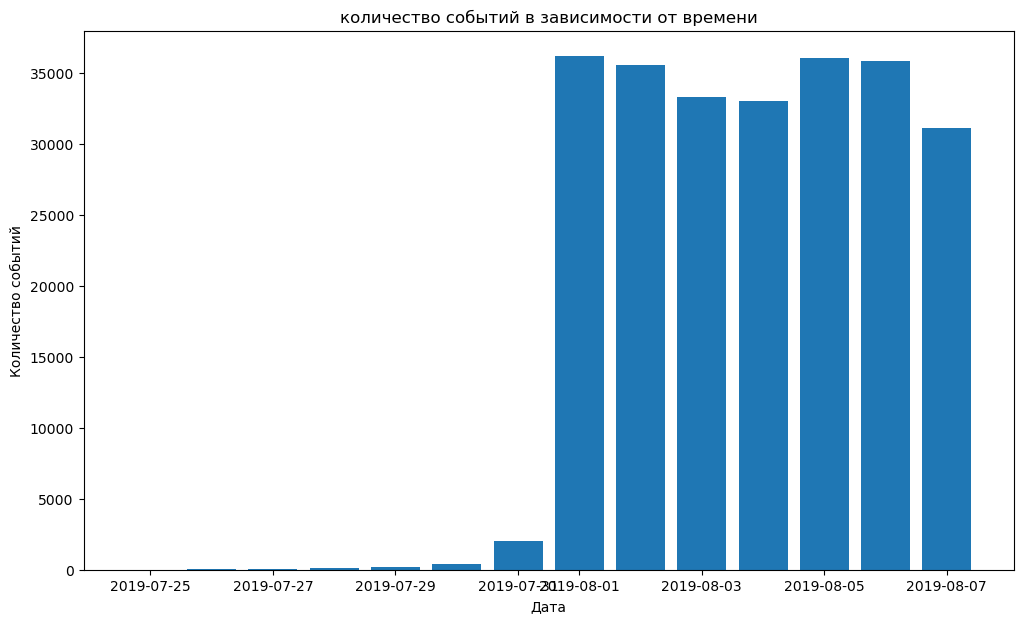

In [20]:
plt.figure(figsize=(12, 7))
x = data['date'].unique()
y = data.groupby(['date'])['event_name'].count()
plt.bar(x, y)
plt.title('количество событий в зависимости от времени')
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.show()

In [21]:
data1 = data[data['date'] >=  datetime.date(2019,8,1)]

In [22]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240887 entries, 2828 to 244125
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       240887 non-null  object        
 1   device_id_hash   240887 non-null  int64         
 2   event_timestamp  240887 non-null  int64         
 3   exp_id           240887 non-null  int64         
 4   date_and_time    240887 non-null  datetime64[ns]
 5   date             240887 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 12.9+ MB


In [23]:
data['event_name'].count() - data1['event_name'].count()

2826

In [24]:
round(100-data1['event_name'].count()/data['event_name'].count()*100, 2)

1.16

In [25]:
data['device_id_hash'].nunique() - data1['device_id_hash'].nunique()

17

In [26]:
round(100-data1['device_id_hash'].nunique()/data['device_id_hash'].nunique()*100, 2)

0.23

In [27]:
data1[data1['exp_id'] == 246]['device_id_hash'].nunique()

2484

In [28]:
data1[data1['exp_id'] == 247]['device_id_hash'].nunique()

2513

In [29]:
data1[data1['exp_id'] == 248]['device_id_hash'].nunique()

2537

Изначально мы располагаем данными за период от 25 июля 2019 до 7 августа 2019. Но на столбчатой диаграмме видно, что полные данные начинаются только 1 августа 2019 года. Это произошло из-за того, что в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого. Поэтому более старые данные стоит отбросить. Таким образом мы потеряли 2926 события (1.16%)и 17 пользователей (0.23%). Мы можем это сделать, так как остались пользователи из всех трех групп.

## Изучение воронки событий.

In [30]:
event_name = data1['event_name'].unique()
event_name

array(['Tutorial', 'MainScreenAppear', 'OffersScreenAppear',
       'CartScreenAppear', 'PaymentScreenSuccessful'], dtype=object)

In [31]:
y = data1.groupby(['event_name']).count().sort_values(by = ['device_id_hash'], ascending=False)['device_id_hash']
y

event_name
MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: device_id_hash, dtype: int64

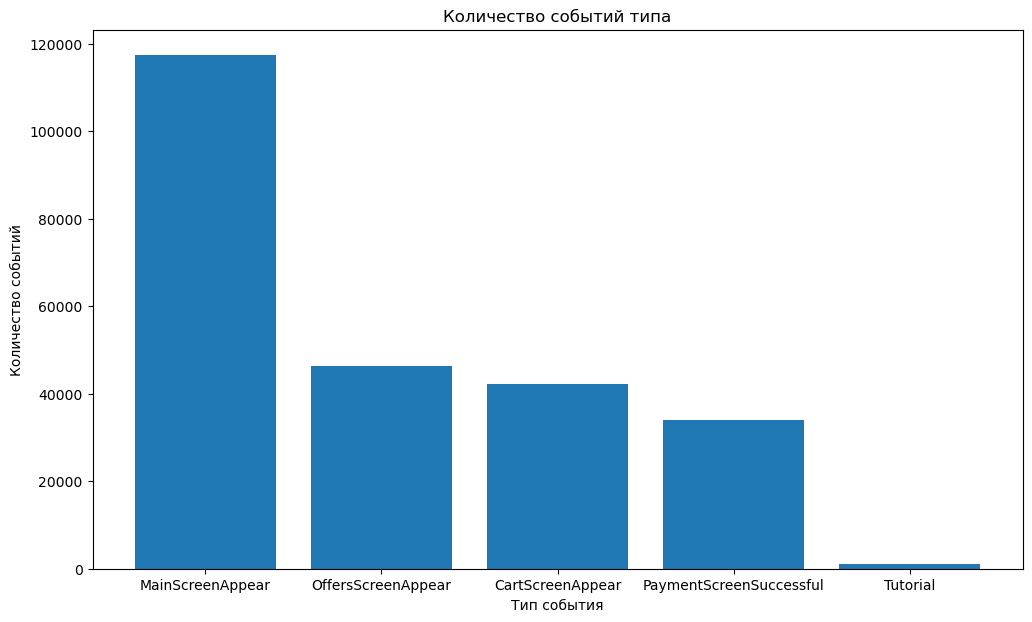

In [32]:
plt.figure(figsize=(12, 7))
plt.bar(['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful', 'Tutorial'], y)
plt.title('Количество событий типа')
plt.xlabel('Тип события')
plt.ylabel('Количество событий')
plt.show()

На шаг MainScreenAppear переходят 117328 пользователя, на OffersScreenAppear - 46333, на CartScreenAppear - 42303, на PaymentScreenSuccessful - 33918, на Tutorial всего 1005.

In [33]:
z = data1.groupby('event_name')['device_id_hash'].nunique().sort_values(ascending=False)
z

event_name
MainScreenAppear           7419
OffersScreenAppear         4593
CartScreenAppear           3734
PaymentScreenSuccessful    3539
Tutorial                    840
Name: device_id_hash, dtype: int64

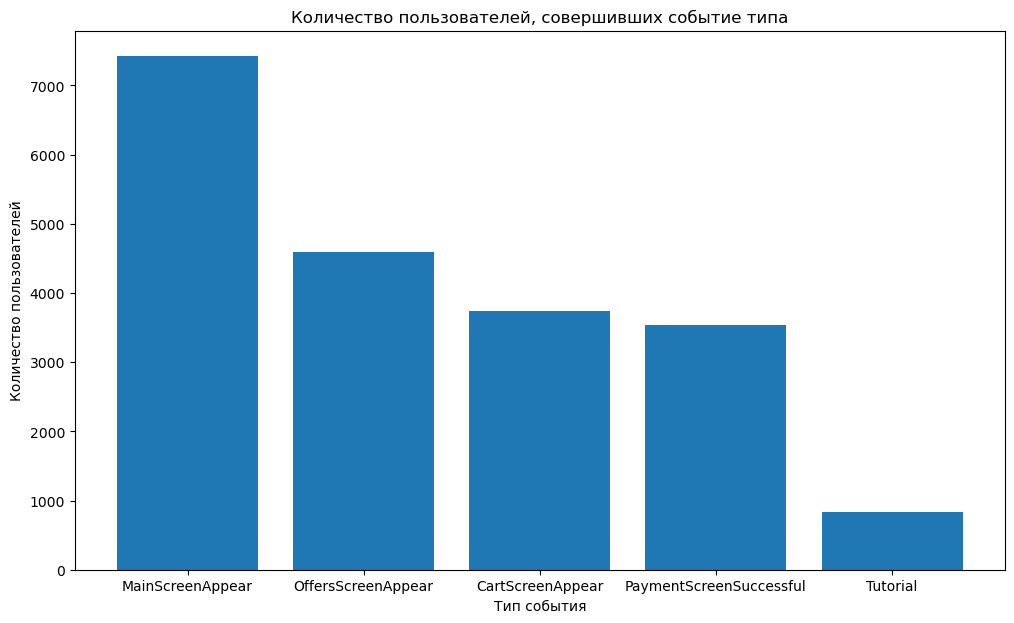

In [34]:
plt.figure(figsize=(12, 7))
plt.bar(['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful', 'Tutorial'], z)
plt.title('Количество пользователей, совершивших событие типа')
plt.xlabel('Тип события')
plt.ylabel('Количество пользователей')
plt.show()

In [35]:
z / data1['device_id_hash'].nunique() * 100

event_name
MainScreenAppear           98.473586
OffersScreenAppear         60.963632
CartScreenAppear           49.561986
PaymentScreenSuccessful    46.973719
Tutorial                   11.149456
Name: device_id_hash, dtype: float64

In [36]:
y = y.to_frame()
z = z.to_frame()

In [37]:
users = z.merge(z / data1['device_id_hash'].nunique() * 100, on='event_name')
users = users.rename(columns = {'device_id_hash_x' : 'device_id_hash', 'device_id_hash_y' : 'n/first'})
users

,device_id_hash,n/first
event_name,,
MainScreenAppear,7419,98.473586
OffersScreenAppear,4593,60.963632
CartScreenAppear,3734,49.561986
PaymentScreenSuccessful,3539,46.973719
Tutorial,840,11.149456


Можно предположить, что последовательность действий такая: MainScreenAppear, OffersScreenAppear, CartScreenAppear, PaymentScreenSuccessful. На страницу Tutorial переходит малое количество пользователей, скорее всего оно не входит в цепочку. На первый шаг - MainScreenAppear переходит 98.5 процентов пользователей. Можно предположить, что это событие совершают не все пользователи из-за технических ошибок.

In [38]:
users['n/n-1'] = users['device_id_hash'] / users['device_id_hash'].shift()*100
users.loc['MainScreenAppear', 'n/n-1'] = 100
users

,device_id_hash,n/first,n/n-1
event_name,,,
MainScreenAppear,7419,98.473586,100.000000
OffersScreenAppear,4593,60.963632,61.908613
CartScreenAppear,3734,49.561986,81.297627
PaymentScreenSuccessful,3539,46.973719,94.777718
Tutorial,840,11.149456,23.735519


Конверсии текущего шага к первому составили 98%, 61%, 50%, 47%. На первый шаг попали не все пользователи, возможно это произошло из-за технических ошибок. Конверсия текущего шага к предыдущему: 100%, 62%, 81%, 95%. БОльше всего пользователей теряются при переходе на шаг OffersScreenAppear, возможно это происходит из-за того,что главный экран не устраивает этих людей.

In [39]:
data1[data1['event_name'] == 'PaymentScreenSuccessful']['device_id_hash'].nunique() /\
data1[data1['event_name'] == 'MainScreenAppear']['device_id_hash'].nunique()

0.47701846610055265

48 процентов пользователей доходят от первого события до оплаты.

## Результаты эксперимента.

In [40]:
data1.groupby('exp_id')['device_id_hash'].nunique()

exp_id
246    2484
247    2513
248    2537
Name: device_id_hash, dtype: int64

In [41]:
data1.groupby('device_id_hash').agg({'exp_id' : 'nunique'}).query('exp_id>1').count()

exp_id    0
dtype: int64

In [42]:
data1.groupby('device_id_hash')['exp_id'].nunique().to_frame().query('exp_id>1').count()

exp_id    0
dtype: int64

В контрольных группах 2484 и 2513 пользователя, в экспериментальной 2537. Нет пользователей, попавших в несколько групп.

Создадим таблицу с количество пользователей по группам на каждом этапе, а также суммарное их количество.

In [43]:
users = data1.pivot_table(index = 'exp_id', columns = 'event_name', values = 'device_id_hash', aggfunc = 'nunique').reset_index()
users

event_name,exp_id,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial
0,246,1266,2450,1542,1200,278
1,247,1238,2476,1520,1158,283
2,248,1230,2493,1531,1181,279


In [44]:
users_count = data1.groupby('exp_id')['device_id_hash'].nunique()
users['total'] = users['exp_id'].apply(lambda x: users_count.loc[x])
users = users.set_index('exp_id')
users

event_name,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial,total
exp_id,,,,,,
246,1266,2450,1542,1200,278,2484
247,1238,2476,1520,1158,283,2513
248,1230,2493,1531,1181,279,2537


Функция для проведения теста:

In [45]:
def test(event, total, alpha):
    p246 = event[0] / total[0]
    p247 = event[1] / total[1]
    psum = (event[0] + event[1]) / (total[0] + total[1])
    dif = p246 - p247
    z = dif / mth.sqrt(psum *(1-psum) * (1/total[0] + 1/total[1]))
    distr = stats.norm(0, 1) 
    
    p_value = (1 - distr.cdf(abs(z))) * 2
    
    print('p-значение: ', p_value)
    
    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

Зададим уровень значимости сначала 0.1:

In [46]:
alpha = 0.01

Нулевая гипотеза: статистических различий между группами нет. Альтернативная: статистические различия между группами есть.

Проведет тест для двух контрольных групп.

In [47]:
test([users['MainScreenAppear'][246], users['MainScreenAppear'][247]], [users['total'][246], users['total'][247]], alpha)

p-значение:  0.7570597232046099
Не получилось отвергнуть нулевую гипотезу


In [48]:
test([users['OffersScreenAppear'][246], users['OffersScreenAppear'][247]], [users['total'][246], users['total'][247]], alpha)

p-значение:  0.2480954578522181
Не получилось отвергнуть нулевую гипотезу


In [49]:
test([users['CartScreenAppear'][246], users['CartScreenAppear'][247]], [users['total'][246], users['total'][247]], alpha)

p-значение:  0.22883372237997213
Не получилось отвергнуть нулевую гипотезу


In [50]:
test([users['PaymentScreenSuccessful'][246], users['PaymentScreenSuccessful'][247]], [users['total'][246], users['total'][247]], alpha)

p-значение:  0.11456679313141849
Не получилось отвергнуть нулевую гипотезу


По результатам теста нельзя отвергнуть нулевую гипотезу. Значит статистической разницы между контрольными группами нет. Это значит, что разбиение пользователей на группы корректно.

Проведем тест для экспериментальной и каждой из контрольной групп, а также с суммарной группой контрольных.

In [51]:
test([users['MainScreenAppear'][246], users['MainScreenAppear'][248]], [users['total'][246], users['total'][248]], alpha)

p-значение:  0.2949721933554552
Не получилось отвергнуть нулевую гипотезу


In [52]:
test([users['OffersScreenAppear'][246], users['OffersScreenAppear'][248]], [users['total'][246], users['total'][248]], alpha)

p-значение:  0.20836205402738917
Не получилось отвергнуть нулевую гипотезу


In [53]:
test([users['CartScreenAppear'][246], users['CartScreenAppear'][248]], [users['total'][246], users['total'][248]], alpha)

p-значение:  0.07842923237520116
Не получилось отвергнуть нулевую гипотезу


In [54]:
test([users['PaymentScreenSuccessful'][246], users['PaymentScreenSuccessful'][248]], [users['total'][246], users['total'][248]], alpha)

p-значение:  0.2122553275697796
Не получилось отвергнуть нулевую гипотезу


In [55]:
test([users['MainScreenAppear'][247], users['MainScreenAppear'][248]], [users['total'][247], users['total'][248]], alpha)

p-значение:  0.4587053616621515
Не получилось отвергнуть нулевую гипотезу


In [56]:
test([users['OffersScreenAppear'][247], users['OffersScreenAppear'][248]], [users['total'][247], users['total'][248]], alpha)

p-значение:  0.9197817830592261
Не получилось отвергнуть нулевую гипотезу


In [57]:
test([users['CartScreenAppear'][247], users['CartScreenAppear'][248]], [users['total'][247], users['total'][248]], alpha)

p-значение:  0.5786197879539783
Не получилось отвергнуть нулевую гипотезу


In [58]:
test([users['PaymentScreenSuccessful'][247], users['PaymentScreenSuccessful'][248]], [users['total'][247], users['total'][248]], alpha)

p-значение:  0.7373415053803964
Не получилось отвергнуть нулевую гипотезу


In [59]:
users.loc['sum'] = users['CartScreenAppear'][246]+users['CartScreenAppear'][247] , users['MainScreenAppear'][246]+users['MainScreenAppear'][247], users['OffersScreenAppear'][246]+users['OffersScreenAppear'][247], users['PaymentScreenSuccessful'][246]+users['PaymentScreenSuccessful'][247], users['Tutorial'][246]+users['Tutorial'][247], users['total'][246]+users['total'][247]
users

event_name,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial,total
exp_id,,,,,,
246,1266,2450,1542,1200,278,2484
247,1238,2476,1520,1158,283,2513
248,1230,2493,1531,1181,279,2537
sum,2504,4926,3062,2358,561,4997


In [60]:
test([users['MainScreenAppear']['sum'], users['MainScreenAppear'][248]], [users['total']['sum'], users['total'][248]], alpha)

p-значение:  0.29424526837179577
Не получилось отвергнуть нулевую гипотезу


In [61]:
test([users['OffersScreenAppear']['sum'], users['OffersScreenAppear'][248]], [users['total']['sum'], users['total'][248]], alpha)

p-значение:  0.43425549655188256
Не получилось отвергнуть нулевую гипотезу


In [62]:
test([users['CartScreenAppear']['sum'], users['CartScreenAppear'][248]], [users['total']['sum'], users['total'][248]], alpha)

p-значение:  0.18175875284404386
Не получилось отвергнуть нулевую гипотезу


In [63]:
test([users['PaymentScreenSuccessful']['sum'], users['PaymentScreenSuccessful'][248]], [users['total']['sum'], users['total'][248]], alpha)

p-значение:  0.6004294282308704
Не получилось отвергнуть нулевую гипотезу


Мы провери 16 тестов, сравнили экспериментальную группу с контрольными, а также с суммой контрольных. По результатам теста не выявленно статистических различий. Шрифт не влияет на конверсию.

In [64]:
1-(1-alpha)**16

0.14854222890512447

In [65]:
alpha = 0.05

In [66]:
1-(1-alpha/16)**16

0.048845042569365726

Уровень значимость в 0.01 нам не подходит, так как вероятность ошибки слишком высока, возьмем уровень значимости 0.05.

In [67]:
test([users['MainScreenAppear'][246], users['MainScreenAppear'][247]], [users['total'][246], users['total'][247]], alpha)

p-значение:  0.7570597232046099
Не получилось отвергнуть нулевую гипотезу


In [68]:
test([users['OffersScreenAppear'][246], users['OffersScreenAppear'][247]], [users['total'][246], users['total'][247]], alpha)

p-значение:  0.2480954578522181
Не получилось отвергнуть нулевую гипотезу


In [69]:
test([users['CartScreenAppear'][246], users['CartScreenAppear'][247]], [users['total'][246], users['total'][247]], alpha)

p-значение:  0.22883372237997213
Не получилось отвергнуть нулевую гипотезу


In [70]:
test([users['PaymentScreenSuccessful'][246], users['PaymentScreenSuccessful'][247]], [users['total'][246], users['total'][247]], alpha)

p-значение:  0.11456679313141849
Не получилось отвергнуть нулевую гипотезу


In [71]:
test([users['MainScreenAppear'][246], users['MainScreenAppear'][248]], [users['total'][246], users['total'][248]], alpha)

p-значение:  0.2949721933554552
Не получилось отвергнуть нулевую гипотезу


In [72]:
test([users['OffersScreenAppear'][246], users['OffersScreenAppear'][248]], [users['total'][246], users['total'][248]], alpha)

p-значение:  0.20836205402738917
Не получилось отвергнуть нулевую гипотезу


In [73]:
test([users['CartScreenAppear'][246], users['CartScreenAppear'][248]], [users['total'][246], users['total'][248]], alpha)

p-значение:  0.07842923237520116
Не получилось отвергнуть нулевую гипотезу


In [74]:
test([users['PaymentScreenSuccessful'][246], users['PaymentScreenSuccessful'][248]], [users['total'][246], users['total'][248]], alpha)

p-значение:  0.2122553275697796
Не получилось отвергнуть нулевую гипотезу


In [75]:
test([users['MainScreenAppear'][247], users['MainScreenAppear'][248]], [users['total'][247], users['total'][248]], alpha)

p-значение:  0.4587053616621515
Не получилось отвергнуть нулевую гипотезу


In [76]:
test([users['OffersScreenAppear'][247], users['OffersScreenAppear'][248]], [users['total'][247], users['total'][248]], alpha)

p-значение:  0.9197817830592261
Не получилось отвергнуть нулевую гипотезу


In [77]:
test([users['CartScreenAppear'][247], users['CartScreenAppear'][248]], [users['total'][247], users['total'][248]], alpha)

p-значение:  0.5786197879539783
Не получилось отвергнуть нулевую гипотезу


In [78]:
test([users['PaymentScreenSuccessful'][247], users['PaymentScreenSuccessful'][248]], [users['total'][247], users['total'][248]], alpha)

p-значение:  0.7373415053803964
Не получилось отвергнуть нулевую гипотезу


In [79]:
test([users['MainScreenAppear']['sum'], users['MainScreenAppear'][248]], [users['total']['sum'], users['total'][248]], alpha)

p-значение:  0.29424526837179577
Не получилось отвергнуть нулевую гипотезу


In [80]:
test([users['OffersScreenAppear']['sum'], users['OffersScreenAppear'][248]], [users['total']['sum'], users['total'][248]], alpha)

p-значение:  0.43425549655188256
Не получилось отвергнуть нулевую гипотезу


In [81]:
test([users['CartScreenAppear']['sum'], users['CartScreenAppear'][248]], [users['total']['sum'], users['total'][248]], alpha)

p-значение:  0.18175875284404386
Не получилось отвергнуть нулевую гипотезу


In [82]:
test([users['PaymentScreenSuccessful']['sum'], users['PaymentScreenSuccessful'][248]], [users['total']['sum'], users['total'][248]], alpha)

p-значение:  0.6004294282308704
Не получилось отвергнуть нулевую гипотезу


При уровне значимости 0.05 не найдено статистически значемых отличий между долями ни по каким группам. Значит изменение шрифтов не повлияло на конверсии.

## Вывод.

* Всего в логе 243713 события, 7551. В среднем на рользователя приходится 32 события.
* Изначально мы имеем данные за две недели, но в первую неделю данные не полные, и мы их отбрасываем. Таким образом у нас есть данные за одну неделю.
* Отбросив данные мы потеряли 2926 события и 17 пользователей. Пользователи остались при этом из всех трех групп.
* События по частоте: MainScreenAppear, OffersScreenAppear, CartScreenAppear, PaymentScreenSuccessful, Tutorial. Tutorial не является обязательным и его посетело малое количетсво людей, не включаем его в воронку.
* Доля пользователей, которые прошли на второй шаг: 62 процента, на третий шаг 81 процент, на чертвертый шаг 95 процентов. Значит больше всего пользователей теряются при переходе на второй шаг.
* 48 процентов пользователей доходят от первого события до оплаты.
* Группа 246: 2484 пользователя, 247: 2513 пользователя, 248: 2537 пользователя.
* По результатам А/А теста статистически значимых различий нет, значит разбиение на группы корректное.
* С уровнем значимости 0.05 по результатам А/В теста статистически значемых различий между группами не найдено. Значит изменение шрифта не повлияло на конверсию.
* Стоит остановить тест и зафиксировать отсутствие различий между группами.